In [2]:
import numpy as np
import matplotlib.pyplot as plt

**ejercicio** : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ]
       
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

**nota**: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [3]:
# tu codigo aqui (~ 5 lineas de codigo):
?np.linspace
first = np.linspace(0,0.5,6)
second = np.linspace(0.51, 0.6, 9, endpoint=False)
third = first[1:] + 0.5
np.concatenate((first, second, third))

array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ])

**Ejemplo aplicado a DS** :  Suavizado de curvas a través de promedios de n-puntos(medias móviles):

<img src="https://www.luisllamas.es/wp-content/uploads/2017/03/arduino-filtro-media-movil-ventana-5.png">

En el mundo la data comunmente posee "ruido" por lo cual muchas veces antes de hacer análisis o modelado se necesita "suavizar" las curvas para reducir este ruido, una técnica muy sencilla es  el suavizado por promedio de n-puntos(también llamado media móvil), esto significa que para cada punto Xn obtenemos una versión transformada(suavizada) que consiste en promediar n puntos cercanos a el, por ejemplo para n= 3 tenemos que:

$$XS_{n}  =  \frac{X_{n-1}+X_{n}+X_{n+1}}{3}$$

[ 0.55639987  0.22304804 -0.17332014 ... -0.60257296  0.52545825
  0.35969707]
[0.55639987 0.20204259 0.28163822 ... 0.08586669 0.09419412 0.35969707]


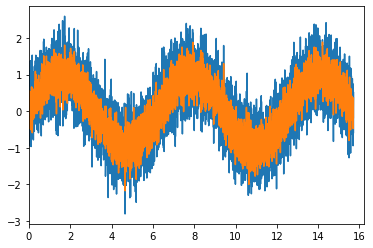

In [4]:
# las siguientes 3 lineas generan un conjunto de datos que se comportan segun una onda senoidal pero tienen
# ruido por lo cual vamos a suavizar usando promedio de 3 puntos
# en este ejercicio los generamos manualmente pero pensemos que son datos que pudieron ser generados con algún
# instrumento como un sensor, o bien estar almacenados en una base de datos
sample_points = 10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

for n in range(1,len(y)-1): #5
    ys[n] = (y[n-1] + y[n] + y[n+1])/3
    
print(y)
print(ys)

plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)
plt.show()

**Ejercicio (parte de tarea)** En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**tip**: usar slicing

[0.00000000e+00 1.57095342e-03 3.14190684e-03 ... 1.57048214e+01
 1.57063923e+01 1.57079633e+01]
[ 0.55639987  0.22304804 -0.17332014 ... -0.60257296  0.52545825
  0.35969707]
[0.55639987 0.20204259 0.28163822 ... 0.08586669 0.09419412 0.35969707]


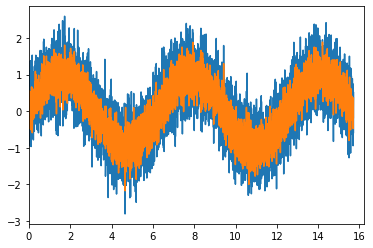

In [5]:
#ys es "y suavizado", inicialmente es una copia de y
cum_y = np.cumsum(y)
ys = np.hstack((y[0], cum_y[2] / 3 , (cum_y[3:] - cum_y[:-3]) / 3, y[-1]))

print(x)
print(y)
print(ys)

plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)
plt.show()

#### Ejemplos en DS:

**1)**
En machine learning se necesita una manera de "evaluar" nuestros modelos ,en ML del tipo "supervisado" para modelos de variables discretas categóricas  usamos  para esto  la "entropía cruzada" que mide la diferencia  entre 2 distribuciones de probabilidad,la que nuestro modelo predice vs la real obtenida de datos **ground truth** , una entropía cruzada alta es un modelo de ML malo y una entropía cruzada de 0 es un modelo de ML perfecto.

La entropía medida en bits(ojo,no cruzada, solo entropía) se define como "el promedio de información"(promedio ponderado) y la información se define como el negativo del logaritmo base 2 de la probabilidad . 

$$I(x) = -log_{2}P(x)$$

**Comentario**:La entropía es una medida de "incerteza", si un evento puede producir muchos resultados diferentes entonces tenemos una alta incerteza del evento lo cual se traduce a entropía alta.

La siguiente función calcula para cierta distribución de probabilidad dada por un vector px la información de cada elemento.

In [6]:
def calcular_informacion(px):
    return np.log2(px)*-1 # teoría de la información

distribucion_prob1 = [1.0]
distribucion_prob2 = [0.5,0.5] # la entropia es maxima cuando todos tienen la misma prob
distribucion_prob3 = [1.0,0.0]
distribucion_prob4 = [0.9999]
distribucion_prob5 = [0.25,0.75]
distribucion_prob6 = [0.2]*5 # ojo estas son listas por lo tanto * la replica, no son arrays de numpy
distribucion_prob7 = [0.4,0.2,0.1,0.1,0.2]

print(calcular_informacion(distribucion_prob1))
print(calcular_informacion(distribucion_prob2))
print(calcular_informacion(distribucion_prob3))
print(calcular_informacion(distribucion_prob4))
print(calcular_informacion(distribucion_prob5))
print(calcular_informacion(distribucion_prob6))
print(calcular_informacion(distribucion_prob7))

[-0.]
[1. 1.]
[-0. inf]
[0.00014428]
[2.        0.4150375]
[2.32192809 2.32192809 2.32192809 2.32192809 2.32192809]
[1.32192809 2.32192809 3.32192809 3.32192809 2.32192809]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


**Ejercicio** Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5    ,    0.31127812]

**Nota**: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

In [7]:
# tu codigo aqui (~ 4 lineas de codigo)
def calcular_terminos_entropia(tensor):
  return calcular_informacion(tensor) * tensor

In [8]:
print(calcular_terminos_entropia(distribucion_prob1))
print(calcular_terminos_entropia(distribucion_prob2))
print(calcular_terminos_entropia(distribucion_prob3))
print(calcular_terminos_entropia(distribucion_prob4))
print(calcular_terminos_entropia(distribucion_prob5))
print(calcular_terminos_entropia(distribucion_prob6))
print(calcular_terminos_entropia(distribucion_prob7))

[-0.]
[0.5 0.5]
[-0. nan]
[0.00014426]
[0.5        0.31127812]
[0.46438562 0.46438562 0.46438562 0.46438562 0.46438562]
[0.52877124 0.46438562 0.33219281 0.33219281 0.46438562]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


**2)** 

A partir de la información en un data warehouse con un modelo de  datos el valor de clientes en el tiempo se ha determinado un modelo predictivo  no lineal que estima cuanta ganancia ha generado cierto cliente en 5 años en base a lo que ha gastado en su primer mes como cliente. 

El modelo tiene la forma:

$$g(x) = (x^{3} + 2x^{2} + e^{0.0001x} -\sqrt{2x})/50$$

Crear una función que calcule la ganancia para valores de gasto de nuevos clientes:

In [9]:
def g(x): #<- vector
    
    ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
    
    return ganancia # <- vector del mismo tamaño que x
    
gastos = np.array([100,50,25,100]) #vector
ganancia = g(gastos)

print("Ganancias",ganancia)

Ganancias [20399.73735829  2599.82010025   337.37862871 20399.73735829]


**Ejercicio** : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función  **ganancia_neta(x,g,c)** donde:
* x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
* g = función que estima la ganancia en función de x
* c = función que estima el costo en función de x

La función realiza el calculo simple **g(x) - c(x)** , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [10]:
def ganancia2(x):
  return np.power(x,2)

def costos(x):
  return np.sqrt(x)

In [11]:
def ganancia_neta(x,g,c):
  return g(x) - c(x)

ganancia_neta(gastos,ganancia2,costos)

array([9990.        , 2492.92893219,  620.        , 9990.        ])

In [12]:
gastos

array([100,  50,  25, 100])

#### Aritmetica acumulativa

En muchos casos es útil usar sumas o productos acumulativos , por ejemplo:

**Ejemplo aplicado** En un datawarehouse se tiene un modelo "lifetime value" en el que se almacena de manera acumulativa cuantas ganancias se han percibido a lo largo de la vida de los usuarios, un ETL en Python debe calcularlo en función de un vector que contiene de manera ordenada en el tiempo los ingresos percibidos mensualmente para cierto usuario. Podemos usar la funcion **np.cumsum** para esto, en este ejercicio necesitamos determinar el "lifetime value" de cierto usuario en su 6to mes:


In [13]:
def lifetime_value(ganancias_mensuales):
    ## tu codigo aqui(~ 1 linea de codigo):
    return np.cumsum(ganancias_mensuales)

# Prueba:
ganancias_usuario = np.array([25,150,125,75,100,45,22,30])
lifetime_value_usuario = lifetime_value(ganancias_usuario)

print("Lifetime value:",lifetime_value_usuario)

print("El valor del usuario a su sexto mes es :",lifetime_value_usuario[5])

Lifetime value: [ 25 175 300 375 475 520 542 572]
El valor del usuario a su sexto mes es : 520


Poseemos también la funcióm similar **np.cumprod** que multiplica de manera acumulativa los elementos de un vector.

In [14]:
print(np.cumprod(ganancias_usuario))

[             25            3750          468750        35156250
      3515625000    158203125000   3480468750000 104414062500000]


#### Estadística descriptiva

https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.statistics.html

**Ejercicio** Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

**tip** investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [15]:
def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
    unique_counts = np.unique(x, return_counts=True)[1]
    i = np.argmax(unique_counts)
    return x[i]
print(x)    
print(mode(x))

[0.00000000e+00 1.57095342e-03 3.14190684e-03 ... 1.57048214e+01
 1.57063923e+01 1.57079633e+01]
0.0


In [16]:
dist_a = np.array([0.3,0.5,0.2])

**Ejercicio** : crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [17]:
# tu codigo aqui (~ 3 lineas de codigo)
def calcular_entropia(tensor):
  return np.sum(calcular_terminos_entropia(tensor))


In [18]:
print(calcular_entropia(distribucion_prob2))
print(calcular_entropia(distribucion_prob3))
print(calcular_entropia(distribucion_prob4))
print(calcular_entropia(distribucion_prob5))
print(calcular_entropia(distribucion_prob6))
print(calcular_entropia(distribucion_prob7))

1.0
nan
0.00014426229037321482
0.8112781244591328
2.321928094887362
2.1219280948873624


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


**Ejercicio**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [19]:
def cross_entropy(Y,Y_hat):
    ##tu codigo aqui (~ 1 lineas de codigo)
    return -1 * np.sum(Y_hat * np.log(Y, where=(Y!=0))) 
    
    

y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,0.1]) # <- resultado de algun modelo predictivo

cross_entropy(y,y_hat)

-1e-323


### Magnitud de un Vector(norma o módulo)

**ejercicio** : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [20]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    return np.sqrt(np.sum(np.power(x,2))) # raiz cuadrada

errores_modelo1 = np.array([1,2,1,2]) #
errores_modelo2 = np.array([0,1,1,2]) #

mag1 = magnitud(errores_modelo1)
mag2 = magnitud(errores_modelo2)

print(mag1)
print(mag2)

# elegir el mejor modelo con una condicional(if)
if mag1 > mag2:
  print("Elegir Modelo 2")
else:
  print("Elegir Modelo 1")

3.1622776601683795
2.449489742783178
Elegir Modelo 2


**ejercicio** Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [21]:
def normalizar(x):
    return x / magnitud(x)

    
    

print(magnitud(normalizar(errores_modelo1)))
print(normalizar(errores_modelo2))

1.0
[0.         0.40824829 0.40824829 0.81649658]


### Producto Punto(escalar,interno,interior) y Ortogonalidad

**Ejercicio aplicado en DS**
Se tiene una red neuronal sencilla(y simplificada) como la de la siguiente imagen:
<img src="https://www.oreilly.com/library/view/practical-convolutional-neural/9781788392303/assets/246151fb-7893-448d-b9bb-7a87b387a24b.png">

Donde:
* INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
* HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
    * HL1 = [0.25,0.37]
    * HL2 = [-8,14]
* OUTPUT_LAYER = capa de salida definida por el vector [4,9]

Crear una funcion neural_network(X) para calcular:
* Calcule la salida de cada neurona en la capa intermedia aplicada a la capa de entrada.
* Use el resultado del paso anterior como entrada para la neurona en la capa de salida

Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X.
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida.

In [22]:
# Aplicar la red neuronal sobre los siguientes datos X

X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
X4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])

def neural_network(x):
  HL1 = np.array([0.25, 0.37])
  HL2 = np.array([-8,14])
  OUT = np.array([4,9])
  val = np.array([np.dot(x, HL1), np.dot(x, HL2)])
  print(f"salida intermedia {val}")
  return np.dot(val, OUT)

print(neural_network(X1)) #HL2
print(neural_network(X2)) #HL2
print(neural_network(X3)) # Ortogonales
print(neural_network(X4)) # HL2
print(neural_network(X5)) #HL1

print("El vector X2 produce la activacion mas alta en la capa de salida.")



salida intermedia [0.3914 6.08  ]
56.2856
salida intermedia [  1.59 130.  ]
1176.36
salida intermedia [0. 0.]
0.0
salida intermedia [0.62 6.  ]
56.48
salida intermedia [-0.74605642  9.68119651]
84.14654290964219
El vector X2 produce la activacion mas alta en la capa de salida.


**Ejercicio aplicado en DS**: la correlación cruzada es una medida de similitud entre 2 funciones como resultado de "desplazar" una sobre la otra, comunmente es usada para encontrar características relevantes en una función desconocida o no controlada.

En procesamiento de señales por ejemplo es usada para buscar y/o filtrar en una señal que varia en el tiempo cierta caracaterística de interés. Aveces es llamada también "sliding dot product" consiste en aplicar en cada punto de una función F el producto punto con cierta función G(comunmente mas corta) y luego "deslizar" G a un nuevo punto de la función, el resultado es una nueva función H que se interpreta como :**cuanto se parece** en cada punto la función F a la característica G. 

<img src="https://i.makeagif.com/media/11-25-2015/LZ9Ufj.gif">

En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos que ya vimos en otro ejemplo:

El primer paso es definir la función G que define el "filtro" a aplicar, para este caso consiste simplemente en un vector con 3 elementos donde cada elemento corresponde a 1/3, luego debemos aplicar el producto punto sobre cada punto de la función o datos originales(en este ejemplo llamados x) a traves aplicar el producto punto en cada elemento "corriendolo" de uno en uno

In [30]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15) 
y = np.sin(x) + ruido

filtro = np.array([1/3,1/3,1/3]) #para lograr las medias moviles a traves de correlacion cruzada

## tu codigo aqui (~ 3 linea de codigo)
# Nota: Siempre usar vectorizacion en el curso y en la carrera.
# Se utilizo np.convolve para cumplir con el requerimiento de no usar ciclos.
ys = np.hstack((y[0], np.convolve(y, filtro, mode="valid"), y[-1]))

print(y)
print(ys)

    



[ 1.42348208e-01  5.21522672e-01  6.60490657e-01  1.03130827e+00
  1.21562162e+00  1.06808101e+00  3.79231409e-01  1.08178116e-01
 -4.65571877e-01 -7.39892283e-01 -1.00409728e+00 -1.06881644e+00
 -8.57378224e-01 -4.28420111e-01  7.30567238e-04]
[ 1.42348208e-01  4.41453846e-01  7.37773865e-01  9.69140180e-01
  1.10500363e+00  8.87644678e-01  5.18496844e-01  7.27921560e-03
 -3.65762015e-01 -7.36520480e-01 -9.37602000e-01 -9.76763980e-01
 -7.84871591e-01 -4.28355923e-01  7.30567238e-04]


### Usando vectores booleanos para acceder elementos en otros vectores

NumPy nos permite acceder vectores con otros vectores de tipo booleano,el resultado de esto es obtener de cierto vector solo los elementos cuya posición corresponde a un valor True en el vector booleano,
con la sintáxis que usabamos para hacer indexing, pero usando un vector booleano como índice
por ejemplo para el caso anterior:

**Ejercicio** dado el vector x, usar operadores lógicos sobre vectores y acceso a  elementos usando vectores booleanos , escribir un programa que calcule eun nuevo vector z conteniendo el valor absoluto de el vector x.

**nota** No se puede usar np.abs() ni ciclos

**tip** usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1

In [24]:
x = np.linspace(-2,2,9)


## tu codigo aqui (~ 4 linea de codigo)
### ver cuales elementos son negativos <- vector booleanos
### multiplicar esos elementos por -1
### usando el vector del rpimer paso remplazar los que eran negativos por su valor calculado en paso 2
print(x)
negative = x < 0
x[negative] = x[negative] * -1
print(x)



[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[2.  1.5 1.  0.5 0.  0.5 1.  1.5 2. ]


**ejercicio** Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

Esta debe funcionar para vectores de cualquier tamaño x:

def h(x):

    ...

**nota** debe ser implementada sin ciclos o ifs 

In [25]:
def h(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    return np.logical_and(0 <= x, x <=1).astype(int)

x = np.array([0.1,-2,0.5,5])
print(h(x))

[1 0 1 0]


**Ejercicio**

Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$



In [26]:
def k(x):
  condiciones = [x<0,np.logical_and(0<=x, x < 1),np.logical_and(1<=x, x < 2)]
  resultados =  [-1 * x ,  x**3, x**2]
  return np.select(condiciones,resultados,4)

x = np.linspace(0,10,10)
print(x)
k(x)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


array([0.       , 1.2345679, 4.       , 4.       , 4.       , 4.       ,
       4.       , 4.       , 4.       , 4.       ])

##### Select y performance
Aun que select es muy conveniente y útil , no es la opción mas eficiente esto debido a que evalua todas las condiciones y todos los resultados, en programación en general buscamos escribir los programas de la manera mas eficiente posible y evitar calculos innecesarios, esto se vuelve vital en ciencia de datos cuando procesamos grandes volúmenes de información, por eso NumPy nos provee la alternativa a select llamada **piecewise** que funciona de manera similar .


Este funciona similar a select pero en vez de calcular todos los posibles resultados, calcula solo aquellos para los que la condición es True e ignora los False,sintácticamente piecewise requiere que los "resultados" sesan calcuados usando una lista de funciones por lo cual todos los resultados deben estar contenidos en una función  y el objeto función ser enviado a piecewise (si la función solo se utiliza una vez para este propósito, se puede usar funciones anónimas o lambda).

**Ejercicio** 
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente
*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x<=1\\\end{cases}$$

Nuevamente, sin utilizar ciclos ni ifs

In [27]:
def m(x):
  np.piecewise(x, [x < 0, np.logical_and(0<=x, x<1), x<=1], [lambda n: np.e ** (2*n), 1, lambda n: np.e ** (1-n)])

x = np.linspace(0,10,10)
print(x)
m(x)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


#### Investigar

* Proyección vectorial
    * Definir una función para calculo en numpy
    * interpretación
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo, tip: Hay un algoritmo de ML cuyo nombre puede ser  útil.
* Producto cruz
    * calculo en numpy
    * interpretación
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo
    
#### Referencias

* https://www.oreilly.com/library/view/data-science-from/9781491901410/ch04.html
* https://towardsdatascience.com/linear-algebra-cheat-sheet-for-deep-learning-cd67aba4526c
* https://www.analyticsvidhya.com/blog/2017/05/comprehensive-guide-to-linear-algebra/
* https://towardsdatascience.com/boost-your-data-sciences-skills-learn-linear-algebra-2c30fdd008cf
* https://machinelearningmastery.com/examples-of-linear-algebra-in-machine-learning/
* https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab

### Proyeccion Vectorial
Existen dos tipos de proyecciones vectoriales entre dos vectores. Cuando se proyecta el vector U sobre V. Y cuando proyectamos el vector V sobre U.

La formula para calcular la magnitud de la proyecto de V sobre U. La magnitud normaliza el vector U y se calcula el producto punto sobre esos dos vectores.

<img src="https://ekuatio.com/wp-content/uploads/proyeccion-vectores-19.png"/>

La formula para calcular el vector resultante de proyectar V sobre U, seria la siguiente: 

<img src="https://ekuatio.com/wp-content/uploads/proyeccion-vectores-21.png" />

Se interpreta como la magnitud de la proyeccion por el vector unitario de U (dandole la direccion al vector resultante).


#### Caso de Uso
Proyección de datos 2D a una línea (PCA)
<img src="https://i.stack.imgur.com/Q7HIP.gif"> Fuente: https://www.juanbarrios.com/inteligencia-artificial-y-machine-learning-para-todos/



Referencias: https://ekuatio.com/proyeccion-de-un-vector-sobre-otro-vector-ejercicios-resueltos/

In [28]:
def vector_projection(u,v):
  scalar = np.dot(u,v)
  mag_v_2 = magnitud(v) ** 2
  return (scalar / mag_v_2) * v

u = np.array([1, 2])
v = np.array([2, 3])
vector_projection(u,v)

array([1.23076923, 1.84615385])

### Producto cruz
El producto cruz o producto vectorial, es el vector perpedicular al plano formado por dos vectores. La magnitud o longitud equivale al area del paralelogramo formado por dos vectores. El vector resultante es un vector perpedicular, y el sentido de este vector lo da la regla de la mano, girando de u a v la direccion a la que quede apuntando el dedo pulgar. Normalmente se define solamente para vectores tridimensionales. [1] 

<img src="https://www.superprof.es/apuntes/wp-content/uploads/2019/05/producto-vectorial-17.gif"/>

Numpy nos provee una funcion para calcular el producto cruz entre dos vectores. 
**np.cross(a,b)**

La interpretacion que se le puede dar al producto cruz, es que tan perpendiculares son los vectores u y v.

#### Caso de Uso
En fisica, el producto cruz se utiliza para calcular un par de fuerza o calcular la fuerza electromagentica de una carga en movimiento. 

Tambien puede ser utilizado para determinar la colinearialidad entre 3 puntos en un espacio 3d.


Referencia: https://nataliaacevedo.com/algebra-lineal-basica-con-numpy-parte-i/

[1]: https://www.redalyc.org/pdf/404/40450103.pdf


In [29]:
# En numpy tenemos numpy.cross
u = np.array([1, 2, 1])
v = np.array([2, 3, 4])
np.cross(u, v)


array([ 5, -2, -1])